<a href="https://colab.research.google.com/github/RAJU009F/GEN-AI-ML/blob/master/Case_Study_SOM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Map

##Install MiniSom Package

In [8]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=caee3f30f356788a6ae14981c45c96017c9c73ca564e8ba753abe6c1ad09245d
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built MiniSom


### Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]


In [4]:
print(y)

[0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0
 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1
 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1
 0 0 0 1 1 1 1 1 0 1 1 0 

## Feature Scaling


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)


In [6]:
print(X)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


##Training the SOM


In [9]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

##Visualizing the results


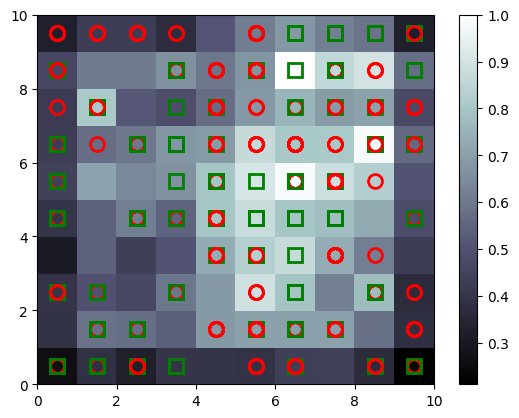

In [10]:
from pylab import bone, pcolor, colorbar, plot , show
bone()
pcolor(som.distance_map().T)
colorbar()
marker = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       marker[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

## Finding the frauds


In [11]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [12]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15707681
15701738
15690169
15648069
15694666
15593959
15629750
15592999
15577771
15593834
15611409
15611682
15608916


# Unsupervised to Supervised

##Get the input

In [13]:
customers = dataset.iloc[:, 1:].values

## create the depenedent variable

In [14]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

##feature scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## ANN impplementation

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
ann = Sequential()

##Add input hidden layer

In [18]:
ann.add(Dense(units=2, activation='relu', input_dim=15, kernel_initializer='uniform'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##add output layer

In [19]:
ann.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

## compile ann

In [20]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##train ann

In [21]:
ann.fit(customers, is_fraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9725 - loss: 0.5829
Epoch 2/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9864 - loss: 0.1992


##predict ann

In [23]:
y_pred= ann.predict(customers)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [24]:
y_pred_cust = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)

In [26]:
print(y_pred_cust[y_pred_cust[:1].argsort()])

[[[1.57395480e+07 5.92078865e-02]
  [1.57761560e+07 3.16303670e-02]]]
